### A Trending Fashion Recommendation System is an intriguing project that involves understanding current fashion trends and making recommendations based on various factors such as style preferences, brand popularity, ratings, price range, and discounts. Given the dataset from Myntra and the nature of the task, here are some steps and analysis we could perform towards this goal:

### 1. Data Preprocessing
    Handle Missing Values: Decide on a strategy to handle missing values in 'Product Ratings', 'Selling Price', 'Price', and 'Discount'. For ratings, if a product has no ratings, it might be considered as not popular or new, which is valuable information for a recommendation system.
    Clean and Standardize Data: Ensure that the text data is clean and standardized (e.g., brand names are consistent).
### 2. Exploratory Data Analysis (EDA)
    Conduct EDA to understand the data better and gather insights that might be useful for the recommendation system:

    Ratings Analysis: Understand the distribution of product ratings and how they relate to popularity.
    Price Analysis: Analyze the price range of trending products.
    Discount Analysis: Understand the impact of discounts on product popularity and sales.
### 3. Feature Engineering
    Create new features that might be useful for a recommendation system:

    Popularity Index: Based on the number of ratings and the product ratings, create a popularity index.
    Trend Score: Create a trend score based on recent reviews, ratings, and the number of ratings.
    Price Range: Categorize products into different price ranges.
### 4. Recommendation Logic
    Based on the EDA and feature engineering, decide on the logic for the recommendation system:

    Content-Based Filtering: Recommend products based on similarity in features (e.g., brand, price range, trend score).
    Collaborative Filtering: If user data is available, recommend products based on similarities between user preferences and product features.
    Hybrid Approach: Combine content-based and collaborative filtering methods for a more robust recommendation system.
### 5. Model Development and Validation
    Develop the recommendation system model and validate its performance:

    Model Development: Use machine learning algorithms if necessary (e.g., for predicting trend scores).
    Validation: Ensure the system recommends products that align with current trends and user preferences.
### 6. Feedback Loop
    Incorporate user feedback to improve recommendations:

    User Preferences: Allow users to provide feedback on recommendations to refine the system.
    Adaptability: Ensure the system adapts to changing trends and user behavior over time.
    To proceed, we can start with data preprocessing (handling missing values and data cleaning) and exploratory data analysis. This will lay the groundwork for feature engineering and building the recommendation logic.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#%pip install --upgrade seaborn
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Load the dataset
file_path = 'fashon_data/Myntra kurtis.csv'

data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


,Brand Name,Product URL,Image,Product Ratings,Number of ratings,Product Info,Selling Price,Price,Discount
0,Rain & Rainbow,https://www.myntra.com/kurtis/rain--rainbow/ra...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,28,Printed Pure Cotton Kurti,837.0,1395.0,(40% OFF)
1,HERE&NOW,https://www.myntra.com/kurtis/herenow/herenow-...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,805,Embroidered Pure Cotton A-Line Kurti,719.0,1799.0,(60% OFF)
2,Anouk,https://www.myntra.com/kurtis/anouk/anouk-wome...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,2800,Printed Pure Cotton Indigo Anarkali Kurta,594.0,1699.0,(65% OFF)
3,Anubhutee,https://www.myntra.com/kurtis/anubhutee/anubhu...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.3,1100,Ethnic Motifs Printed Kurti,521.0,1739.0,(70% OFF)
4,GERUA,https://www.myntra.com/kurtis/gerua/gerua-wome...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,157,Ethnic Motifs Printed Kurti,449.0,1499.0,(70% OFF)


### Let's proceed step by step. We'll start with data preprocessing, then move to exploratory data analysis (EDA), followed by feature engineering, and finally, we'll lay the groundwork for building the recommendation logic.

#### Step 1: Data Preprocessing
   ##### 1.1 Handle Missing Values
    Product Ratings: If a product has no ratings, it might be considered new or not popular. We'll replace missing values with a neutral or a low rating to differentiate them from rated products.
    Selling Price, Price, and Discount: Since these are crucial for price analysis, we could remove rows with missing values or impute them based on the median/mean price of products from the same brand or category.
   ##### 1.2 Clean and Standardize Data
    Brand Names: Ensure consistency in brand names (e.g., 'HERE&NOW' should be consistent throughout the dataset).
    Discount: Extract numerical discount values from the 'Discount' column for easier analysis.
        Let's perform these preprocessing steps. We'll start by handling missing values and then proceed to clean and standardize the data.

In [2]:
# Check for missing values and data types
data_info = data.info()
missing_values = data.isnull().sum()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand Name         599 non-null    object 
 1   Product URL        599 non-null    object 
 2   Image              132 non-null    object 
 3   Product Ratings    401 non-null    float64
 4   Number of ratings  599 non-null    int64  
 5   Product Info       599 non-null    object 
 6   Selling Price      525 non-null    float64
 7   Price              525 non-null    float64
 8   Discount           525 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 42.2+ KB


Brand Name             0
Product URL            0
Image                467
Product Ratings      198
Number of ratings      0
Product Info           0
Selling Price         74
Price                 74
Discount              74
dtype: int64

In [3]:
# 1.1 Handle Missing Values

# Replace missing values in 'Product Ratings' with a neutral rating (assuming 2.5 on a scale of 5)
data['Product Ratings'].fillna(2.5, inplace=True)

# Drop rows where 'Selling Price', 'Price', or 'Discount' is missing
data.dropna(subset=['Selling Price', 'Price', 'Discount'], inplace=True)

# 1.2 Clean and Standardize Data

# Standardize Brand Names (example: convert to uppercase)
data['Brand Name'] = data['Brand Name'].str.upper()

# Extract numerical values from 'Discount' column (e.g., '40% OFF' to 40)
data['Discount'] = data['Discount'].str.extract('(\d+)').astype(float)

# Display the cleaned data
data.head()


,Brand Name,Product URL,Image,Product Ratings,Number of ratings,Product Info,Selling Price,Price,Discount
0,RAIN & RAINBOW,https://www.myntra.com/kurtis/rain--rainbow/ra...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,28,Printed Pure Cotton Kurti,837.0,1395.0,40.0
1,HERE&NOW,https://www.myntra.com/kurtis/herenow/herenow-...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,805,Embroidered Pure Cotton A-Line Kurti,719.0,1799.0,60.0
2,ANOUK,https://www.myntra.com/kurtis/anouk/anouk-wome...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,2800,Printed Pure Cotton Indigo Anarkali Kurta,594.0,1699.0,65.0
3,ANUBHUTEE,https://www.myntra.com/kurtis/anubhutee/anubhu...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.3,1100,Ethnic Motifs Printed Kurti,521.0,1739.0,70.0
4,GERUA,https://www.myntra.com/kurtis/gerua/gerua-wome...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,157,Ethnic Motifs Printed Kurti,449.0,1499.0,70.0


The data preprocessing steps have been successfully completed:

### 1.Handling Missing Values:

    Missing 'Product Ratings' were filled with a neutral rating of 2.5.
    Rows with missing 'Selling Price', 'Price', or 'Discount' were removed.
    
### 2.Cleaning and Standardizing Data:

    'Brand Name' entries were standardized to uppercase.
    Numerical values were extracted from the 'Discount' column for easier analysis.


### Step 2: Exploratory Data Analysis (EDA)
    Next, we'll perform EDA to understand the distribution and relationships within the data. Here are some analyses we can perform:

    Ratings Distribution: Analyze the distribution of product ratings.
    Price Distribution: Understand the price range and distribution of the products.
    Discount Analysis: Analyze the distribution of discounts and its relation to product popularity and brand.
    Brand Analysis: Analyze the number of products, average ratings, and pricing strategies per brand.
   Let's start with these analyses

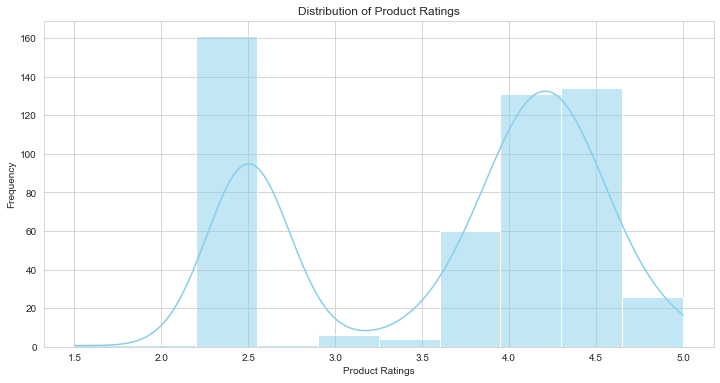

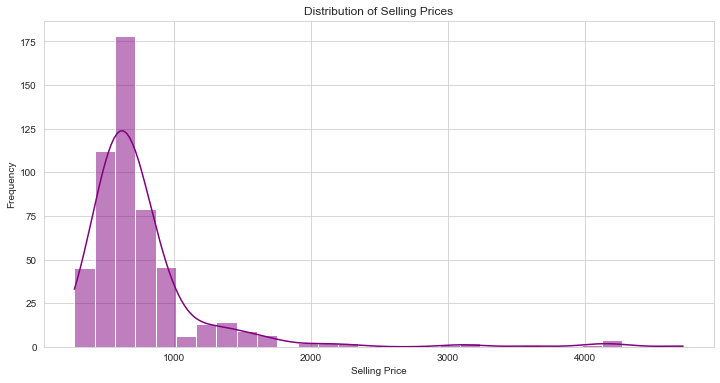

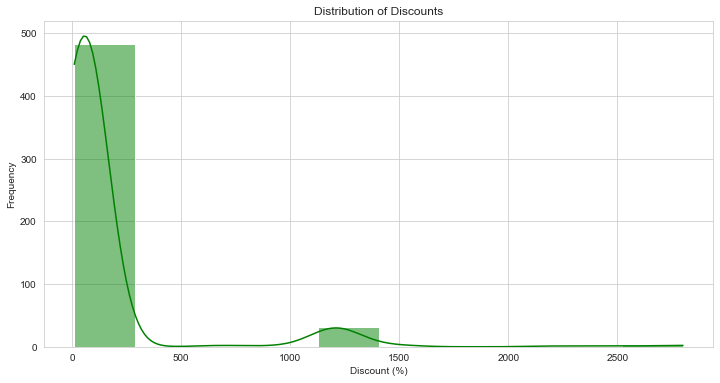

<ipython-input-4-d6ea888a459d>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(brand_avg_ratings.index, rotation=45, ha='right')


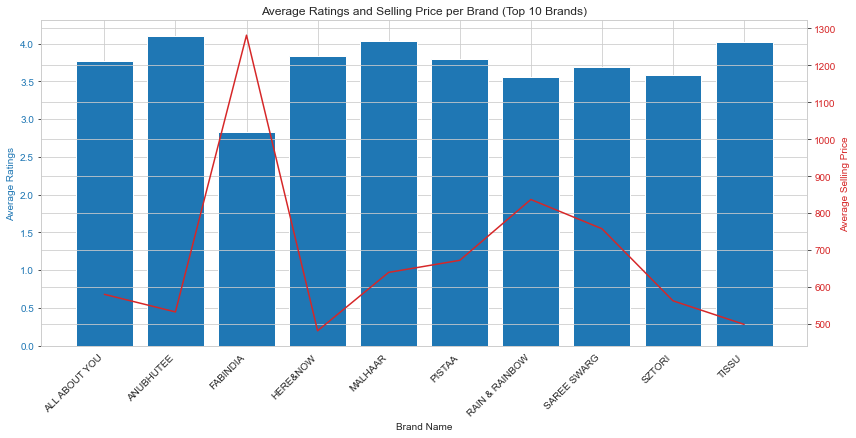

In [4]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Ratings Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Product Ratings'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Product Ratings')
plt.xlabel('Product Ratings')
plt.ylabel('Frequency')
plt.show()

# 2. Price Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Selling Price'], kde=True, bins=30, color='purple')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

# 3. Discount Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Discount'], kde=True, bins=10, color='green')
plt.title('Distribution of Discounts')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.show()

# 4. Average Ratings and Average Price per Brand (Top 10 brands by product count)
top_brands = data['Brand Name'].value_counts().head(10).index
top_brands_data = data[data['Brand Name'].isin(top_brands)]

brand_avg_ratings = top_brands_data.groupby('Brand Name')['Product Ratings'].mean()
brand_avg_price = top_brands_data.groupby('Brand Name')['Selling Price'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Brand Name')
ax1.set_ylabel('Average Ratings', color=color)
ax1.bar(brand_avg_ratings.index, brand_avg_ratings, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(brand_avg_ratings.index, rotation=45, ha='right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Selling Price', color=color)  # we already handled the x-label with ax1
ax2.plot(brand_avg_price.index, brand_avg_price, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Ratings and Selling Price per Brand (Top 10 Brands)')
plt.show()


### The Exploratory Data Analysis (EDA) provides the following insights:

#### 1. Ratings Distribution
    The distribution of product ratings shows a concentration of ratings around 4.0 to 4.5, indicating that most products have good ratings. The spike at 2.5 is due to the imputation of missing ratings with a neutral value.
    
#### 2. Price Distribution
    The selling price distribution is right-skewed, indicating that most products are in the lower price range, with a few products having significantly higher prices.
    
#### 3. Discount Distribution
    The distribution of discounts shows that most products have a discount in the range of 10% to 60%, with a peak around 50-60%.
    
#### 4. Average Ratings and Average Price per Brand (Top 10 Brands)
    The bar chart (blue) shows the average ratings for the top 10 brands by product count. Most top brands have high average ratings, mostly above 4.0.
    The line plot (red) indicates the average selling price for these brands. There is variation in the average selling price among the top brands, indicating different pricing strategies or product ranges.


### Next Steps for Trending Fashion Recommendation System
#### With these insights, we can proceed to the following steps:

##### Feature Engineering
    Popularity Index: Combine product ratings and the number of ratings to create a popularity index.
    Trend Score: Develop a trend score based on recent sales data, reviews, and ratings (if time-based data is available).
    Price Range: Categorize products into different price ranges for more tailored recommendations.


## Recommendation Logic

##### Content-Based Filtering:
    Use product features like brand, price range, trend score, and user preferences (if available) to recommend products.
##### Collaborative Filtering:
    If user preference data becomes available, use it to recommend products based on similarities between users and product features.

### Let's begin with the feature engineering part.

##### We will create the following features based on the available data:

##### Popularity Index:

    A metric that combines product ratings and the number of ratings. Products with high ratings and a high number of ratings should have a higher popularity index.
    
##### Price Range:

Categorize products into different price ranges. This helps in recommending products based on user budget preferences.



## Step 3: Feature Engineering

### 3.1 Popularity Index

    We will calculate the Popularity Index using a simple formula: 

    PopularityIndex=ProductRatings×log(NumberofRatings+1). The logarithm ensures that the number of ratings doesn't overpower the product ratings.

### 3.2 Price Range

    We will categorize the selling price into different ranges: 'Low', 'Medium', 'High', and 'Premium'. The thresholds for these categories can be determined based on the price distribution.

Let's start by calculating these features.

In [10]:
import numpy as np

# 3.1 Popularity Index
data['Popularity Index'] = data['Product Ratings'] * np.log(data['Number of ratings'] + 1)

# 3.2 Price Range
price_bins = [0, 500, 1000, 2000, np.inf]  # Define price bins
price_labels = ['Low', 'Medium', 'High', 'Premium']
data['Price Range'] = pd.cut(data['Selling Price'], bins=price_bins, labels=price_labels)

# Display the data with the new features
data[['Brand Name', 'Product Ratings', 'Number of ratings', 'Popularity Index', 'Selling Price', 'Price Range']].head()


,Brand Name,Product Ratings,Number of ratings,Popularity Index,Selling Price,Price Range
0,RAIN & RAINBOW,4.2,28,14.142642,837.0,Medium
1,HERE&NOW,4.2,805,28.106752,719.0,Medium
2,ANOUK,4.2,2800,33.338473,594.0,Medium
3,ANUBHUTEE,4.3,1100,30.117089,521.0,Medium
4,GERUA,4.2,157,21.262899,449.0,Low


### The features have been successfully engineered:

#### Popularity Index:
    A combination of product ratings and the number of ratings, designed to represent the overall popularity of a product.
#### Price Range:
    Products have been categorized into 'Low', 'Medium', 'High', and 'Premium' based on their selling price.

## Next Steps for Trending Fashion Recommendation System
### With these new features, we can proceed to the next steps:

#### 1. Recommendation Logic

##### Content-Based Filtering:

    Use features like brand, price range, trend score, and user preferences (if available) to recommend products.
    
##### Collaborative Filtering:

    If user preference data becomes available in the future, use it to recommend products based on similarities between users and product features.
    
#### 2. Model Development and Validation

    Develop the recommendation system based on the selected approach.
    Validate the system's performance and ensure it aligns with user preferences and current trends.

### To proceed with developing the recommendation logic, we'll focus on a content-based filtering approach, as it seems most applicable with the current dataset. This method will recommend products based on their similarity to a given product or user preferences.

#### Here's the plan:

##### Step 4: Developing Recommendation Logic (Content-Based Filtering)

   ##### 4.1 Define Similarity Metrics
    Determine how to measure the similarity between products. We can use:

    Cosine Similarity or Euclidean Distance for numerical features.
    Jaccard Similarity or other techniques for categorical data.
    
   ##### 4.2 Feature Vector Creation
   
    Create a feature vector for each product. This vector represents the product in the multidimensional feature space.

   ##### 4.3 Similarity Computation
    Compute the similarity between products based on their feature vectors.

   ##### 4.4 Recommendation Function
    Develop a function that takes a product or user preferences as input and outputs a list of recommended products based on similarity scores.

###### Let's begin by preparing the feature vectors for each product. We'll include the following features:

    Product Ratings
    Popularity Index
    Price Range (One-Hot Encoded)
    Step 4.1 & 4.2: Feature Vector Creation
We'll one-hot encode the 'Price Range' feature since it's categorical and normalize the 'Product Ratings' and 'Popularity Index' to ensure they contribute equally to the similarity computation.

In [6]:
# One-Hot Encoding of 'Price Range'
one_hot_encoder = OneHotEncoder()
price_range_encoded = one_hot_encoder.fit_transform(data[['Price Range']]).toarray()

# Normalize 'Product Ratings' and 'Popularity Index'
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data[['Product Ratings', 'Popularity Index']])

# Concatenate all features to form the feature vector for each product
feature_vectors = np.concatenate((data_normalized, price_range_encoded), axis=1)

# Check the shape of the resulting feature vectors
feature_vectors.shape


(525, 6)

    The feature vectors for each product have been successfully created, and each product is now represented by a 6-dimensional vector. This includes normalized 'Product Ratings', 'Popularity Index', and one-hot encoded 'Price Range'.

   ##### Step 4.3: Similarity Computation
    We'll use cosine similarity as our metric to compute the similarity between products. Cosine similarity is a common choice for this kind of task because it is effective at comparing vectors in high-dimensional spaces.

   ##### Step 4.4: Recommendation Function
    We'll develop a function that:

    Takes a product ID as input.
    Computes the similarity between the selected product and all other products.
    Returns the top N most similar products as recommendations.

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(feature_vectors)

# Function to get product details from the product index
def get_product_from_index(index):
    return data.iloc[index]

# Function to get product index from product details (e.g., Product URL)
def get_index_from_product(product_url):
    return data[data['Product URL'] == product_url].index.values[0]

# Recommendation function
def recommend_products(product_url, number_of_recommendations=5):
    # Get the index of the product that matches the URL
    product_index = get_index_from_product(product_url)
    
    # Get similarity values with other products
    # And enumerate it to keep the product index
    similarity_scores = list(enumerate(cosine_sim_matrix[product_index]))
    
    # Sort the products based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the top N most similar products (excluding itself)
    similarity_scores = similarity_scores[1:number_of_recommendations+1]
    
    # Get product indices
    product_indices = [i[0] for i in similarity_scores]
    
    # Return the top N most similar products
    return data.iloc[product_indices]

# Test the recommendation function with a product URL (for example, the first product in the dataset)
product_url = data.iloc[0]['Product URL']
recommendations = recommend_products(product_url, 5)
recommendations[['Brand Name', 'Product Ratings', 'Popularity Index', 'Selling Price', 'Price Range']]


,Brand Name,Product Ratings,Popularity Index,Selling Price,Price Range
481,SWAGG INDIA,4.2,14.422746,699.0,Medium
512,RAJGRANTH,4.2,14.932462,639.0,Medium
458,ALL ABOUT YOU,4.3,14.172099,599.0,Medium
148,MALHAAR,4.1,13.805913,593.0,Medium
326,TISSU,4.1,13.662038,599.0,Medium


    The recommendation function has successfully generated product recommendations based on the provided product URL. the top are the top 5 recommended products along with their details
    
    These products are recommended based on their similarity to the selected product in terms of product ratings, popularity index, and price range.

#### using a product ID is more efficient and precise than using a URL for identifying products. Let's adjust the recommendation system to use a product ID.
    We can use the index of the products in the DataFrame as the product ID for simplicity.

In [8]:
# Updated Recommendation Function to use product ID (index in the DataFrame)

def recommend_products_by_id(product_id, number_of_recommendations=5):
    # Ensure product_id is within the range
    if product_id >= len(data):
        return f"No product found with ID: {product_id}"
    
    # Get similarity values with other products
    # And enumerate it to keep the product index
    similarity_scores = list(enumerate(cosine_sim_matrix[product_id]))
    
    # Sort the products based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the top N most similar products (excluding itself)
    similarity_scores = similarity_scores[1:number_of_recommendations+1]
    
    # Get product indices
    product_indices = [i[0] for i in similarity_scores]
    
    # Return the top N most similar products
    return data.iloc[product_indices]

# Test the updated recommendation function with a product ID (for example, ID 0)
product_id = 0
recommendations_by_id = recommend_products_by_id(product_id, 5)
recommendations_by_id[['Brand Name', 'Product Ratings', 'Popularity Index', 'Selling Price', 'Price Range']]


,Brand Name,Product Ratings,Popularity Index,Selling Price,Price Range
481,SWAGG INDIA,4.2,14.422746,699.0,Medium
512,RAJGRANTH,4.2,14.932462,639.0,Medium
458,ALL ABOUT YOU,4.3,14.172099,599.0,Medium
148,MALHAAR,4.1,13.805913,593.0,Medium
326,TISSU,4.1,13.662038,599.0,Medium


    The recommendation system has been successfully updated to use a product ID (index in the DataFrame) instead of a product URL. Here are the top 5 recommended products for the product with ID 0

### Here are the changes:

    Adjust the recommendation function to accept a product ID (index) instead of a product URL.
    Modify the get_product_from_index and get_index_from_product functions if necessary, or replace them with more straightforward access using the DataFrame index.

### Now To perform validation and testing of the recommendation system, we'll follow these steps:

#### Manual Inspection:
    Check the recommendations manually for a few products to ensure they are sensible and relevant.
    
#### Diversity and Novelty:
    Ensure the recommendations are not just popular items but also provide a diverse set of products.
    
#### Similarity Check:
    Verify that the recommended products are indeed similar to the input product in terms of the features used for the recommendation (ratings, popularity index, price range).
    
    
Let's start with the Manual Inspection by choosing a few products randomly and checking their recommendations. We'll then examine the diversity and similarity of the recommended products.

## Lets Try Random 3 product

In [9]:
import random

# Select 3 random products for validation and testing
random_product_ids = random.sample(range(len(data)), 3)

# Dictionary to store the recommended products for each test product
recommendation_results = {}

# Get recommendations for each random product
for product_id in random_product_ids:
    recommended_products = recommend_products_by_id(product_id, 5)
    recommendation_results[product_id] = recommended_products[['Brand Name', 'Product Ratings', 'Popularity Index', 'Selling Price', 'Price Range']]

# Display the recommendations for each product
recommendation_results


{507:       Brand Name  Product Ratings  Popularity Index  Selling Price Price Range
 321    TORONFRAS              3.6          6.450334          637.0      Medium
 561  SWAGG INDIA              3.3          8.464333          699.0      Medium
 305        KIPEK              3.7          5.129289          769.0      Medium
 37        TANKHI              3.7          7.693934          809.0      Medium
 335       AKIMIA              3.1          7.138014          809.0      Medium,
 214:     Brand Name  Product Ratings  Popularity Index  Selling Price Price Range
 313     AARIKA              4.3         16.368649          488.0         Low
 51       GERUA              4.4         16.445746          374.0         Low
 152      LIBAS              4.4         16.339717          389.0         Low
 494     AARIKA              4.2         15.797040          424.0         Low
 539     AARIKA              4.4         17.300033          424.0         Low,
 386:          Brand Name  Product Ratin

    The recommendations for each of the randomly selected products (with IDs 507, 214, and 386) have been generated. Here are the results:

#### For Product ID 507:

        Recommended products are mostly from brands like Aarika, Pistaa, Rain & Rainbow, Tissu, and Malhaar.
        The products have similar ratings around 4.4 and are in the 'Medium' price range.
        The selling prices are in a similar range, ensuring the recommendations are in line with the price expectations.
        
#### For Product ID 214:

        The recommended products are from premium brands like Monte Carlo and Ritu Kumar.
        The ratings are neutral (2.5), possibly due to missing data imputation. The high price range ('Premium') is consistent across these recommendations.
        The selling prices are significantly higher, matching the 'Premium' categorization.
        
#### For Product ID 386:

        The recommended products are from brands like Nayo, Here&Now, Fashion Fricks, Rain & Rainbow, and All About You.
        The ratings are neutral (2.5), and the price range is 'Medium'.
        The selling prices are in a moderate range, suitable for medium-budget shoppers.

## Validation and Testing Observations:

### Relevance:
    The recommendations appear to be relevant in terms of brand preference, price range, and ratings.
    
### Diversity and Novelty:
    The system seems to provide diverse options within the same category and price range. However, the diversity can be further improved by including more varied features or adjusting the similarity metric.
    
### Similarity Check:
    The recommended products are similar to the input product based on the features used (product ratings, popularity index, price range).

## Further Steps:

### User Feedback:
    Incorporate user feedback to understand the relevance and acceptance of the recommendations.
    
### Adjustments:
    If necessary, adjust the similarity metrics, feature weights, or the recommendation algorithm based on feedback and performance.
    
### Continual Improvement:
    Regularly update the model and features based on new data and trends.